<a href="https://colab.research.google.com/github/ShannonH98/PyTorch_Practice_Projects/blob/main/Stocks_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install seaborn
!pip install tensorboard

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
import seaborn as sns
from tensorflow import keras
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
from datetime import datetime


In [8]:

torch.cuda.is_available()

False

In [9]:
current_datetime = datetime.now()
print("Current Datetime Object:", current_datetime)

Current Datetime Object: 2025-11-28 20:34:10.468327


In [10]:
#import stock data from nintendo
#from kaggle directly
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stealthtechnologies/nintendo-stock-data")

print("Path to dataset files:", path)

100%|██████████| 123k/123k [00:00<00:00, 40.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/stealthtechnologies/nintendo-stock-data/versions/1


In [11]:
!ls /root/.cache/kagglehub/datasets/stealthtechnologies/nintendo-stock-data/versions/1


Nintendo_stock_data.csv


In [15]:
stock_data = pd.read_csv('/root/.cache/kagglehub/datasets/stealthtechnologies/nintendo-stock-data/versions/1/Nintendo_stock_data.csv')

In [16]:
print(stock_data.head())

         Date    Open   High     Low   Close  Adj Close   Volume
0  1996-11-18  1.8000  1.800  1.7250  1.8000   1.710279   406500
1  1996-11-19  1.8000  1.800  1.7250  1.8000   1.710279   690500
2  1996-11-20  1.8125  1.850  1.7000  1.8125   1.722156   280000
3  1996-11-21  1.8000  1.825  1.7125  1.8000   1.710279   458500
4  1996-11-22  1.8250  1.850  1.7500  1.8250   1.734033  1000500


In [31]:
print(stock_data.tail())

           Date   Open   High    Low  Close  Adj Close  Volume
6934 2024-06-10  13.79  13.96  13.78  13.95      13.95  581900
6935 2024-06-11  13.81  13.90  13.67  13.72      13.72  511300
6936 2024-06-12  13.66  13.80  13.61  13.65      13.65  701800
6937 2024-06-13  13.28  13.36  13.19  13.24      13.24  598800
6938 2024-06-14  13.35  13.44  13.34  13.39      13.39  513600


In [17]:
print(stock_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6939 entries, 0 to 6938
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6939 non-null   object 
 1   Open       6939 non-null   float64
 2   High       6939 non-null   float64
 3   Low        6939 non-null   float64
 4   Close      6939 non-null   float64
 5   Adj Close  6939 non-null   float64
 6   Volume     6939 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 379.6+ KB
None


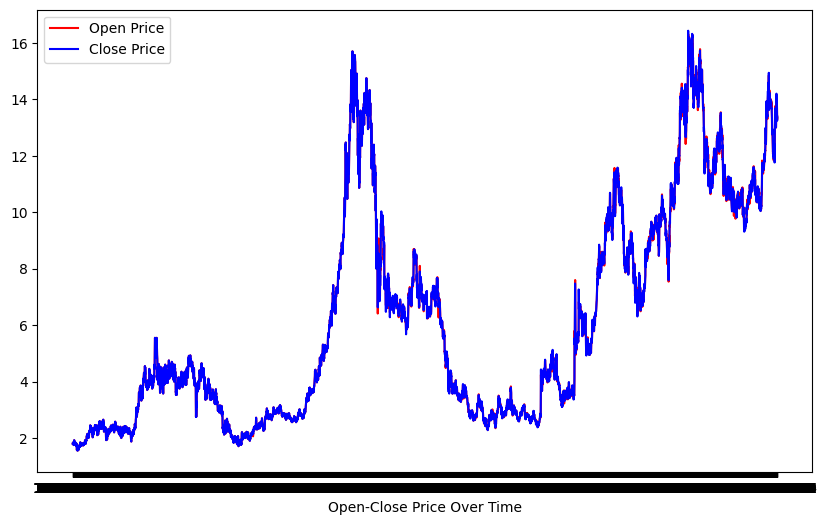

In [24]:
#Initial Data Visualization

plt.figure(figsize=(10, 6))

plt.plot(stock_data['Date'], stock_data['Open'], label='Open Price', color="red")
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color="blue")
plt.xlabel('Open-Close Price Over Time')
plt.legend()
plt.show()

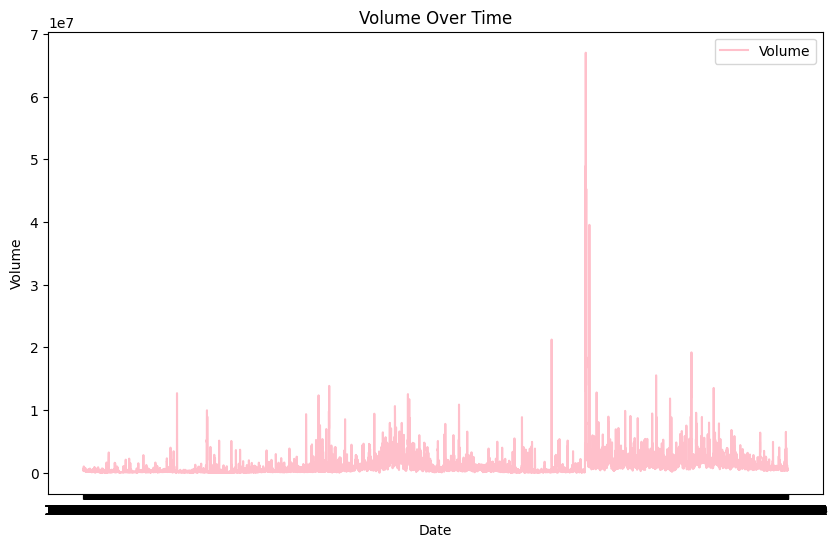

In [27]:
plt.figure(figsize=(10, 6))

plt.plot(stock_data['Date'], stock_data['Volume'], label='Volume', color="pink")
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [28]:
numeric_data = stock_data.select_dtypes(include=["int64", "float64"])

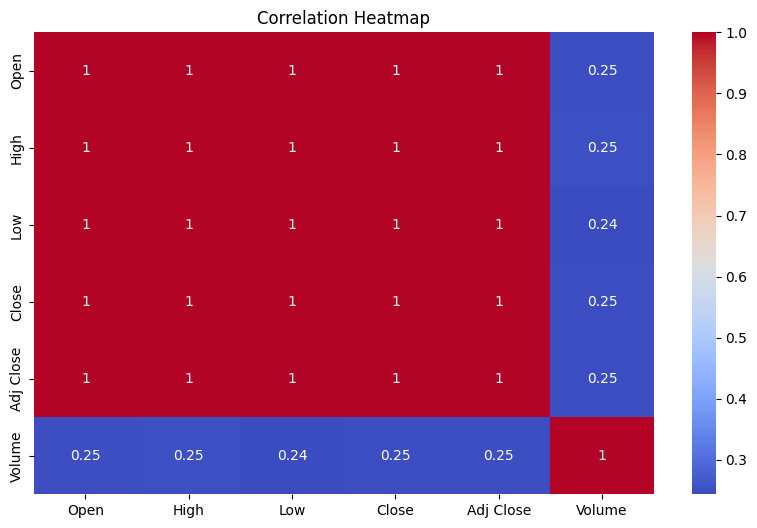

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#check correlaton between features

In [32]:
#convert the data
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

prediction = stock_data.loc[
    (stock_data['Date'] > datetime(2020, 1, 1)) &
    (stock_data['Date'] < datetime(2023, 12, 31))
]

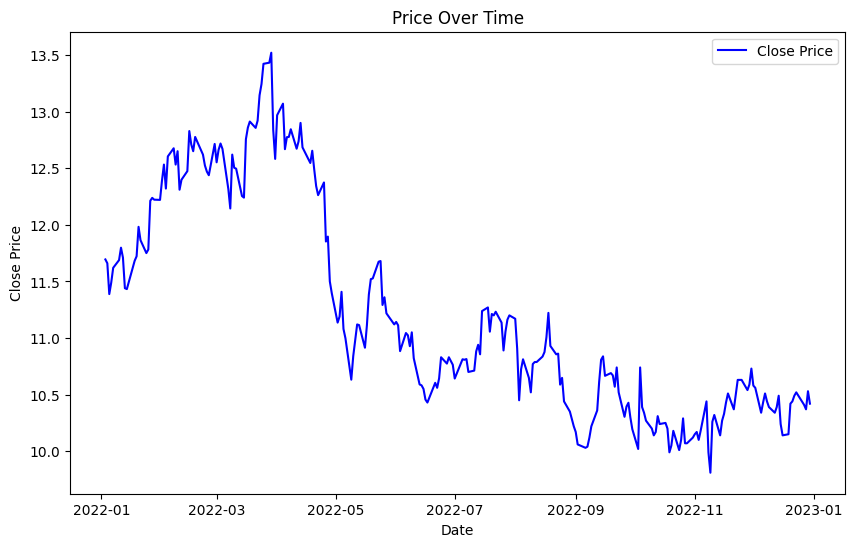

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(prediction ['Date'],prediction ['Close'], label='Close Price', color="blue")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Price Over Time')
plt.legend()
plt.show()

In [38]:
stock_close = stock_data['Close']
dataset = stock_close.values
training_data_len = int(np.ceil(len(dataset)*0.8))

In [39]:
training_data_len

5552

In [49]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(dataset.reshape(-1, 1))

training_data = scaled_data[:training_data_len]

X_train, y_train = [], []

for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [45]:
#Build the Model

model = keras.models.Sequential()

model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(64, return_sequences=False))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer='adam', loss='mae', metrics=[keras.metrics.RootMeanSquaredError()])

In [50]:
training = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.1905 - root_mean_squared_error: 0.2874
Epoch 2/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - loss: 0.0748 - root_mean_squared_error: 0.1041
Epoch 3/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - loss: 0.0665 - root_mean_squared_error: 0.0943
Epoch 4/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - loss: 0.0690 - root_mean_squared_error: 0.0958
Epoch 5/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - loss: 0.0587 - root_mean_squared_error: 0.0822
Epoch 6/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 24s 89ms/step - loss: 0.0583 - root_mean_squared_error: 0.0826
Epoch 7/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - loss: 0.0575 - root_mean_squared_error: 0.0798
Epoch 8/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - loss: 0.0541 - root_mean_squared_error: 0.0757
Epoch 9/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 0.0567 - root_mean_squared_error: 0.0816
Epoch 10/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 0.0520 - 

In [52]:
test_data = scaled_data[training_data_len - 60:]
X_test, y_test = [], dataset[training_data_len:]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [53]:
predictions = model.predict(X_test)
predictions = scalar.inverse_transform(predictions)

44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step


In [56]:
train = stock_close[:training_data_len]
test = stock_close[training_data_len:]

test = test.copy()

test['Predictions'] = predictions

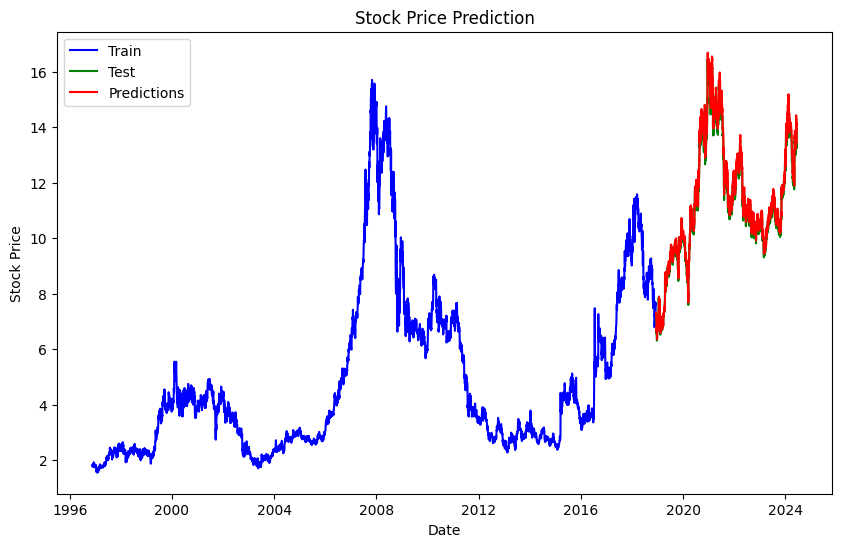

In [62]:
train_data = stock_data.iloc[:training_data_len].copy()
test_data = stock_data.iloc[training_data_len:].copy()

test_data['Predictions'] = predictions

plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Close'], label='Train', color="blue")
plt.plot(test_data['Date'], test_data['Close'], label='Test', color="green")
plt.plot(test_data['Date'], test_data['Predictions'], label='Predictions', color="red")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()